# Marketing Campaign

From [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1)

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.regression import linear_model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)

In [2]:
# While loading file need to specify the separator as tab character or whitespace
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
# Convert Dt_Customer to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

We have 29 columns, most of them integer




Check for Null values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Check for Duplicated rown

In [8]:
 df.dropna(inplace = True)

In [9]:
df.shape

(2216, 29)

In [10]:
df.T.duplicated().sum()

0

## Numeric Columns

Let's look at the statistic of the numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [12]:
df['age'] = 2017 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [13]:
list_to_plot = df.select_dtypes(include=np.number).columns.tolist()

In [14]:
to_remove = ['ID', 'Z_CostContact', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Kidhome', 'Teenhome']
for item in to_remove:
    list_to_plot.remove(item)

In [15]:
num_columns = list_to_plot

## Categorical columns

In [16]:
df.drop(index=df[df['Marital_Status'] == 'YOLO'].index, inplace=True)
df.drop(index=df[df['Marital_Status'] == 'Absurd'].index, inplace=True)

In [17]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Together', 'Married', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Alone', 'Single', df['Marital_Status'])

In [18]:
categorical_columns = df.select_dtypes(include="object_").columns.tolist()

Let's do some simple feature engineering on the datetime column and extract month and year.

In [19]:
df['Dt_MONTH'] = df['Dt_Customer'].dt.month
df['Dt_YEAR'] = df['Dt_Customer'].dt.year
to_remove.append('Dt_Customer')
df.drop(columns=to_remove, axis=1, inplace=True)

In [20]:
num_columns.extend(['Dt_MONTH', 'Dt_YEAR'])

In [21]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Dt_MONTH,Dt_YEAR
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1,60,4,2012
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,63,8,2014
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,52,8,2013
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,33,10,2014
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,36,1,2014


## Column Transformer and Pipeline

In [22]:
X = df.drop(columns='Response')
y = df['Response']

In [23]:
print(X.shape, y.shape)

(2212, 18) (2212,)


In [24]:
num_columns.remove('Response')
num_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'age',
 'Dt_MONTH',
 'Dt_YEAR']

In [25]:
categorical_columns

['Education', 'Marital_Status']

In [26]:
X

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,Dt_MONTH,Dt_YEAR
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,60,4,2012
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,63,8,2014
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,52,8,2013
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,33,10,2014
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,36,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,50,6,2013
2236,PhD,Married,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,71,10,2014
2237,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,36,1,2014
2238,Master,Married,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,61,1,2014


In [27]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, categorical_columns)])

In [28]:
# Pipleine with model
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=500))])

In [29]:
# Split the data with 33% to test and keepinf the same balance that we have in y (Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [30]:
print(X_train.shape, y_train.shape)

(1482, 18) (1482,)


In [31]:
print(X_test.shape, y_test.shape)

(730, 18) (730,)


## Isolating the Outliers

We'll now get rid of outliers on the train set.

Even though Kidhome, Teenhome and NumDealPurchases are numerical, they only have discrete values so we won't remove outliers fro this columns.

In [32]:
# Loop through columns
for column in list_to_plot:
    if column == 'Kidhome' or column == 'Teenhome' or column == 'NumDealsPurchases': 
        continue
    # Keep all data below 95% percentile of that for that column
    X_train = X_train[X_train[column] < X_train[column].quantile(0.95)]
    X_test = X_test[X_test[column] < X_test[column].quantile(0.95)]

In [33]:
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [34]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.903


In [35]:


set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth', 'age',
                                                   'Dt_MONTH', 'Dt_YEAR']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('classifier', LogisticRegression(max_iter=500))])

## Confusion Matrix

In [36]:
y_test_pred = clf.predict(X_test)

In [37]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,182,7
Actual 1,13,5


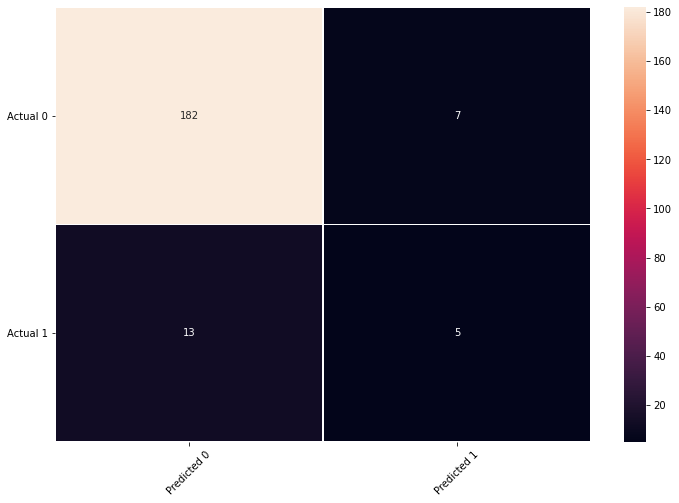

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

## GridSearchCV

In [39]:
param_grid = {
    "preprocessor__num__scaler": [MinMaxScaler(), StandardScaler()],
    "classifier__C": [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Income',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurchases',
                                                                          'NumWebPurchases',
                                                                          'NumCatalogPurchases',
                                                                          'NumStorePurchases',
                                                                          'NumWebVisitsMonth',
                                                                          'age',
                                                                          'Dt_MONTH',
                                                                          'Dt_YEAR']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Education',
                                                                          'Marital_Status'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__num__scaler': [MinMaxScaler(),
                                                       StandardScaler()]})

In [40]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__num__scaler': MinMaxScaler()}


In [43]:
print(f"Train CV score: {grid_search.best_score_:.3f}")

Train CV score: 0.884


In [44]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best logistic regression from grid search: 0.913


In [48]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__scaler",
        "param_classifier__C",
    ]
].head(5)

,mean_test_score,std_test_score,param_preprocessor__num__scaler,param_classifier__C
0,0.883939,0.008692,MinMaxScaler(),0.1
1,0.877172,0.015400,StandardScaler(),0.1
2,0.877172,0.015547,MinMaxScaler(),1.0
3,0.876970,0.037672,StandardScaler(),1.0
6,0.872677,0.033835,MinMaxScaler(),100


In [49]:
y_test_pred = grid_search.predict(X_test)

In [50]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,189,0
Actual 1,18,0


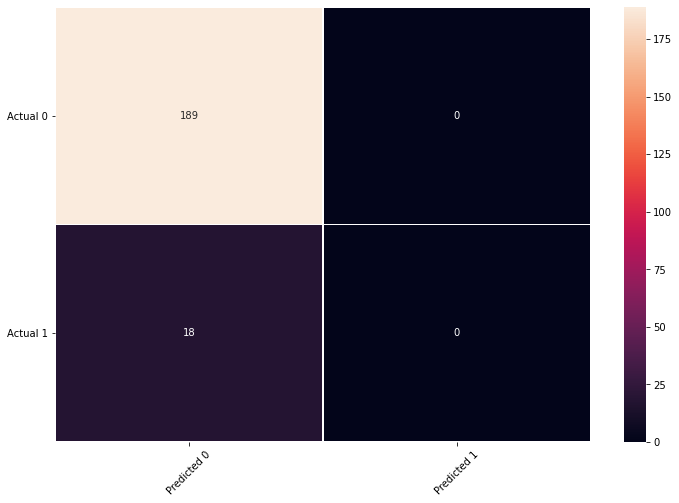

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()